## Lectura Delaware




Lectura de los archivos de reviews de Delaware


In [1]:
import pandas as pd
import numpy as np
import missingno as msxo
import glob
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

Lectura de archivos json de las reviews efectuadas en el estado de Delaware . Voy a proceder a realizar la lectura y juntar dichos archivos, al tener todos la misma estructura es posible realizarlo mediante iteracion.

In [2]:
df_1 = pd.read_json('C:/Users/tomas/Desktop/DS - HENRY/00.LABS/3.PF/GOOGLE/reviews-estados/review-Delaware/1.json', lines= True)
df_2 = pd.read_json('C:/Users/tomas/Desktop/DS - HENRY/00.LABS/3.PF/GOOGLE/reviews-estados/review-Delaware/2.json', lines= True)
df_3 = pd.read_json('C:/Users/tomas/Desktop/DS - HENRY/00.LABS/3.PF/GOOGLE/reviews-estados/review-Delaware/3.json', lines= True)
df_4 = pd.read_json('C:/Users/tomas/Desktop/DS - HENRY/00.LABS/3.PF/GOOGLE/reviews-estados/review-Delaware/4.json', lines= True)
df_5 = pd.read_json('C:/Users/tomas/Desktop/DS - HENRY/00.LABS/3.PF/GOOGLE/reviews-estados/review-Delaware/5.json', lines= True)
df_6 = pd.read_json('C:/Users/tomas/Desktop/DS - HENRY/00.LABS/3.PF/GOOGLE/reviews-estados/review-Delaware/6.json', lines= True)
df_7 = pd.read_json('C:/Users/tomas/Desktop/DS - HENRY/00.LABS/3.PF/GOOGLE/reviews-estados/review-Delaware/7.json', lines= True)

C:\Users\tomas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\core\dtypes\astype.py:189: RuntimeWarning: invalid value encountered in cast
  return values.astype(dtype, copy=copy)
C:\Users\tomas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\core\dtypes\astype.py:189: RuntimeWarning: invalid value encountered in cast
  return values.astype(dtype, copy=copy)
C:\Users\tomas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\core\dtypes\astype.py:189: RuntimeWarning: invalid value encountered in cast
  return values.astype(dtype, copy=copy)
C:\Users\tomas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\core\dtypes\astype.py:189: RuntimeWarning: invalid value encou

In [3]:
# Creo una lista para poder juntar todos los dataframes de los archivos en uno
dfs = []

# Itero entre cada uno de los dataframes para juntarlos en uno solo
for i in range(1, 8):
    
    df = globals()[f'df_{i}']
    dfs.append(df)


reviews_Delaware = pd.concat(dfs, ignore_index=True)

In [4]:
# Vista primeros registros
reviews_Delaware.head(3)

,user_id,name,time,rating,text,pics,resp,gmap_id
0,1.137980e+20,Heather Carper,1507258129698,5,Lived here for 3 years and enjoyed it. Locatio...,[{'url': ['https://lh5.googleusercontent.com/p...,None,0x89b8b77c34771c5f:0xf768433b3a39763
1,1.089116e+20,STACY CLAVETTE,1544802238870,5,Nice complex and awesome staff. Maintenance i...,None,None,0x89b8b77c34771c5f:0xf768433b3a39763
2,1.101471e+20,Zion Hood,1559123933643,5,Good places for people to live my friend lives...,None,None,0x89b8b77c34771c5f:0xf768433b3a39763


In [5]:
# Miro cuantos registros tenemos en el dataframe unido

reviews_Delaware.shape

(905537, 8)

In [6]:
# Miro el tipo de información

reviews_Delaware.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 905537 entries, 0 to 905536
Data columns (total 8 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   user_id  905537 non-null  float64
 1   name     905537 non-null  object 
 2   time     905537 non-null  int64  
 3   rating   905537 non-null  int64  
 4   text     497198 non-null  object 
 5   pics     19031 non-null   object 
 6   resp     98075 non-null   object 
 7   gmap_id  905537 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 55.3+ MB


In [7]:
# Checkeo de nulos y su porcentaje

nulls_FL = pd.DataFrame(reviews_Delaware.isnull().sum().sort_values(ascending = False))
nulls_FL["Porcentaje de nulos"] = round(nulls_FL/reviews_Delaware.shape[0]*100,2)
nulls_FL.rename(columns = {0:"Nro nulos"})

,Nro nulos,Porcentaje de nulos
pics,886506,97.90
resp,807462,89.17
text,408339,45.09
user_id,0,0.00
name,0,0.00
time,0,0.00
rating,0,0.00
gmap_id,0,0.00


In [8]:
reviews_Delaware.columns

Index(['user_id', 'name', 'time', 'rating', 'text', 'pics', 'resp', 'gmap_id'], dtype='object')

In [9]:
usuarios= reviews_Delaware.user_id.nunique()

In [10]:
reviews= reviews_Delaware.text.count()

In [11]:
print('En el estado de Delaware, tenemos',usuarios,' usuarios que dejaron',reviews, 'reseñas.')

En el estado de Delaware, tenemos 34261  usuarios que dejaron 497198 reseñas.


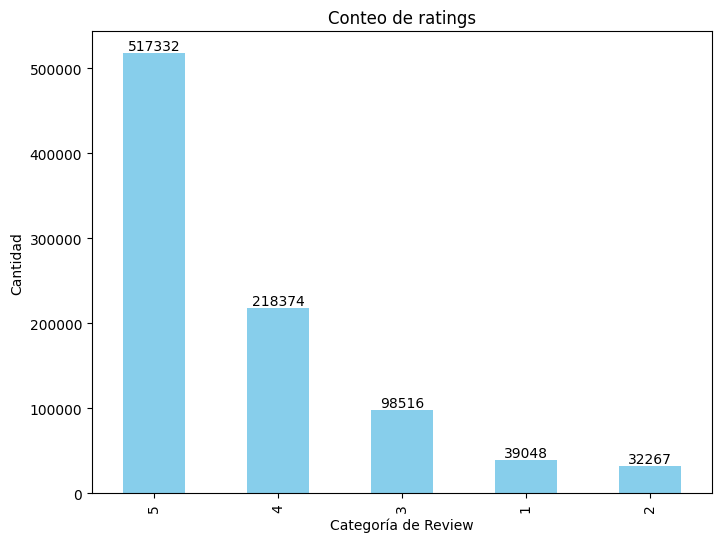

In [12]:
rating = reviews_Delaware.rating.value_counts()

# Crear el gráfico de barras
plt.figure(figsize=(8, 6))
rating.plot(kind='bar', color='skyblue')

# Agregar etiquetas a las barras
for i, count in enumerate(rating):
    plt.text(i, count, str(count), ha='center', va='bottom')

# Configuración de etiquetas y título
plt.xlabel('Categoría de Review')
plt.ylabel('Cantidad')
plt.title('Conteo de ratings')

# Mostrar el gráfico
plt.show()


In [13]:
reviews_Delaware['time'] = pd.to_datetime(reviews_Delaware['time'], unit='ms').dt.strftime('%d/%m/%Y')

In [14]:
reviews_Delaware['time'] = pd.to_datetime(reviews_Delaware['time'], format='%d/%m/%Y')

reviews_Delaware['year'] = reviews_Delaware['time'].dt.year

In [15]:
min_date = reviews_Delaware.time.min()
minimun_date = pd.to_datetime(min_date)
print(min_date)
print(minimun_date)

2007-11-09 00:00:00
2007-11-09 00:00:00


In [16]:
max_date = reviews_Delaware.time.max()
maximun_date = pd.to_datetime(max_date)
print(max_date)
print(maximun_date)

2021-09-07 00:00:00
2021-09-07 00:00:00


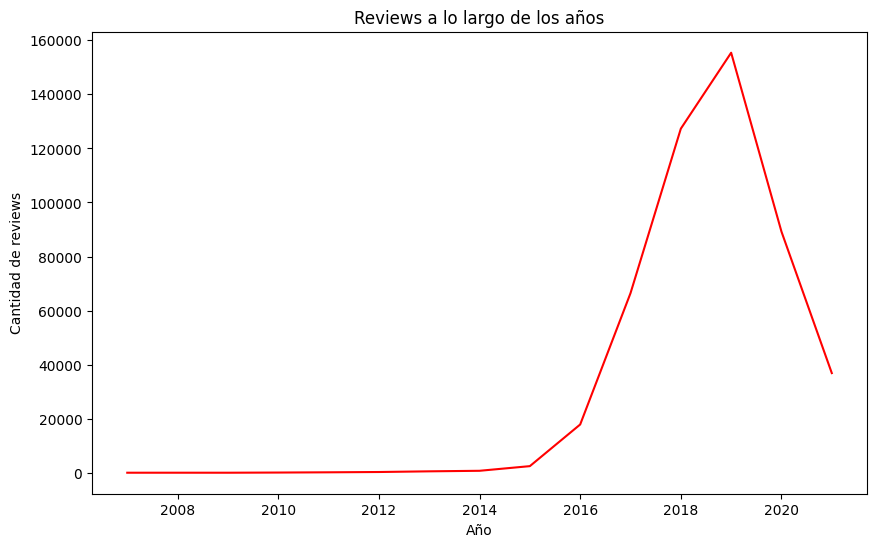

In [17]:
conteo_por_año= reviews_Delaware[['year', 'text']].groupby('year').count().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(data=conteo_por_año, x='year', y= 'text', color='red')
plt.xlabel('Año')
plt.ylabel('Cantidad de reviews')
plt.title('Reviews a lo largo de los años')
plt.show()


In [18]:
reviews_Delaware["text"] = reviews_Delaware["text"].astype(str)
reviews_Delaware.dropna(subset=["text"], inplace=True)

In [19]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\tomas\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\tomas\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\tomas\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\tomas\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


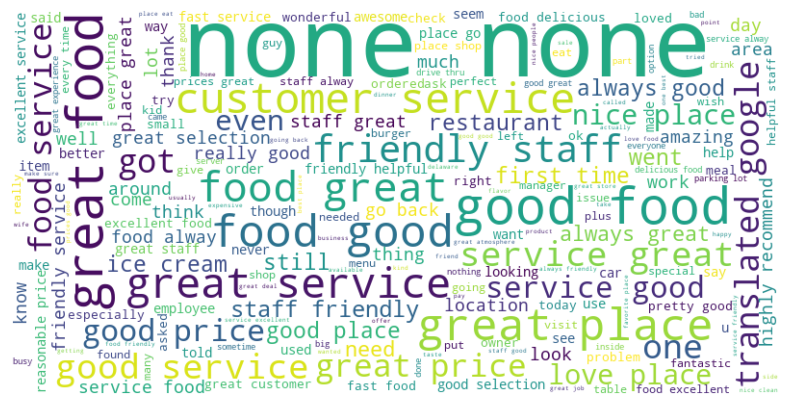

In [20]:
# Assuming you have a DataFrame named "reviews_XXXXXXXXXXXXXXXXXX" with a "text" column
texto = " ".join(reviews_Delaware["text"])

# Download NLTK data for tokenization and stopwords
nltk.download('punkt')
nltk.download('stopwords')

# Tokenization and removing stopwords
stop_words = set(stopwords.words("english"))
words = word_tokenize(texto)
words = [word.lower() for word in words if word.isalpha() and word.lower() not in stop_words]

# Join the words into a text string
texto_procesado = " ".join(words)

# Create the word cloud
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(texto_procesado)

# Visualize the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()
